# Inspecting Electric Vehicle Charging Trends

<img src =  'IMG_8807.png'>

The US Government's Alternative Fuels Data Center collects records of electric vehicle (EV) charging infrastructure, including charging ports and station locations, as well as sales of electric vehicles. With the EV market rapidly evolving, it's essential to understand the growth trends in charging facilities and sales to inform strategic planning.

The US Government's Alternative Fuels Data Center collects records of electric vehicle (EV) charging infrastructure, including charging ports and station locations, as well as sales of electric vehicles. With the EV market rapidly evolving, it's essential to understand the growth trends in charging facilities and sales to inform strategic planning.

### `Dataset Details`

___

`private_ev_charging.csv`

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection |
| `private_ports`| The number of available charging ports owned by private companies in a given year  |
| `private_station_locations`   | The number of privately owned station locations for EV charging

___

`public_ev_charging.csv`
 
| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection  |
| `public_ports`| The number of available charging ports under public ownership in a given year  |
| `public_station_locations`   | The number of publicly owned station locations for EV charging

___

The sales information is available for each model and year in the `ev_sales.csv` file:

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `Vehicle` |  Electric vehicle model |
| `year`| Year of data collection |
| `sales`   | The number of vehicles sold in the US

In [2]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext lab_black

In [33]:
# load the data

public = pd.read_csv("public_ev_charging.csv")
private = pd.read_csv("private_ev_charging.csv")
sales = pd.read_csv("ev_sales.csv")

display(public.head())
display(private.head())
display(sales.head())

,year,public_ports,public_station_locations
0,2013,16619,6938
1,2014,22470,9207
2,2015,26532,10710
3,2016,33165,13150
4,2017,45789,16170


,year,private_ports,private_station_locations
0,2014,3695,1825
1,2015,4150,1962
2,2016,5763,2331
3,2017,6048,2370
4,2018,6812,2489


,Vehicle,year,sales
0,Chevy Volt,2011,7671.0
1,Chevy Volt,2012,23461.0
2,Chevy Volt,2013,23094.0
3,Chevy Volt,2014,18805.0
4,Chevy Volt,2015,15393.0


In [35]:
# data summary

public.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   year                      10 non-null     int64
 1   public_ports              10 non-null     int64
 2   public_station_locations  10 non-null     int64
dtypes: int64(3)
memory usage: 368.0 bytes


In [36]:
private.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   year                       9 non-null      int64
 1   private_ports              9 non-null      int64
 2   private_station_locations  9 non-null      int64
dtypes: int64(3)
memory usage: 344.0 bytes


In [37]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Vehicle  495 non-null    object 
 1   year     495 non-null    int64  
 2   sales    241 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.7+ KB


In [38]:
# joining the public and private charging stations dataset
df_temp = public.merge(private, on="year", how="outer", indicator=True)
df_temp = df_temp[df_temp["_merge"] == "both"]
df_temp = df_temp.drop(columns="_merge")
df_temp

,year,public_ports,public_station_locations,private_ports,private_station_locations
1,2014,22470,9207,3695.0,1825.0
2,2015,26532,10710,4150.0,1962.0
3,2016,33165,13150,5763.0,2331.0
4,2017,45789,16170,6048.0,2370.0
5,2018,56842,19893,6812.0,2489.0
6,2019,73838,23282,9955.0,3078.0
7,2020,96190,28602,10647.0,2768.0
8,2021,114451,46407,18867.0,4074.0
9,2022,136513,53764,19993.0,4435.0


In [39]:
print("df_temp shape: ", df_temp.shape)
df_temp.isna().sum()

df_temp shape:  (9, 5)


year                         0
public_ports                 0
public_station_locations     0
private_ports                0
private_station_locations    0
dtype: int64

In [40]:
# sum of vehicles sales year wise

temp = sales.groupby("year")["sales"].sum().reset_index()
temp

,year,sales
0,2011,17763.0
1,2012,53171.0
2,2013,97102.0
3,2014,118882.0
4,2015,114023.0
5,2016,159616.0
6,2017,195581.0
7,2018,361315.0
8,2019,326644.0


In [41]:
df_complete = df_temp.merge(temp, on="year", how="left")
df_complete = df_complete.dropna(subset="sales")

In [42]:
df_complete

,year,public_ports,public_station_locations,private_ports,private_station_locations,sales
0,2014,22470,9207,3695.0,1825.0,118882.0
1,2015,26532,10710,4150.0,1962.0,114023.0
2,2016,33165,13150,5763.0,2331.0,159616.0
3,2017,45789,16170,6048.0,2370.0,195581.0
4,2018,56842,19893,6812.0,2489.0,361315.0
5,2019,73838,23282,9955.0,3078.0,326644.0


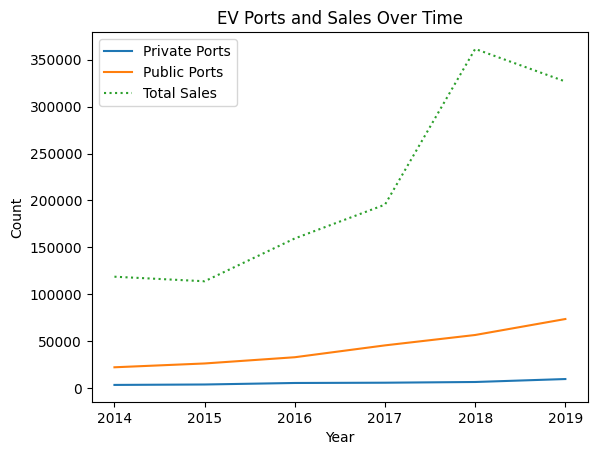

In [43]:
fig, ax = plt.subplots()
sns.lineplot(data=df_complete, x="year", y="private_ports", label="Private Ports")
sns.lineplot(data=df_complete, x="year", y="public_ports", label="Public Ports")
sns.lineplot(data=df_complete, x="year", y="sales", label="Total Sales", linestyle=":")
ax.set_title("EV Ports and Sales Over Time")
ax.set(xlabel="Year", ylabel="Count")
ax.legend(loc="upper left")
plt.show()

from the above graph it is clear that with increase in the public charging points the sales of electric vehicles also increases.

In [51]:
sales.isna().sum()

Vehicle      0
year         0
sales      254
dtype: int64

In [53]:
sales1 = sales[~sales["sales"].isna()]

In [62]:
# sales of different vehicles over the years.

data = sales1.groupby(["Vehicle", "year"])["sales"].sum().reset_index()

<Axes: xlabel='year', ylabel='sales'>

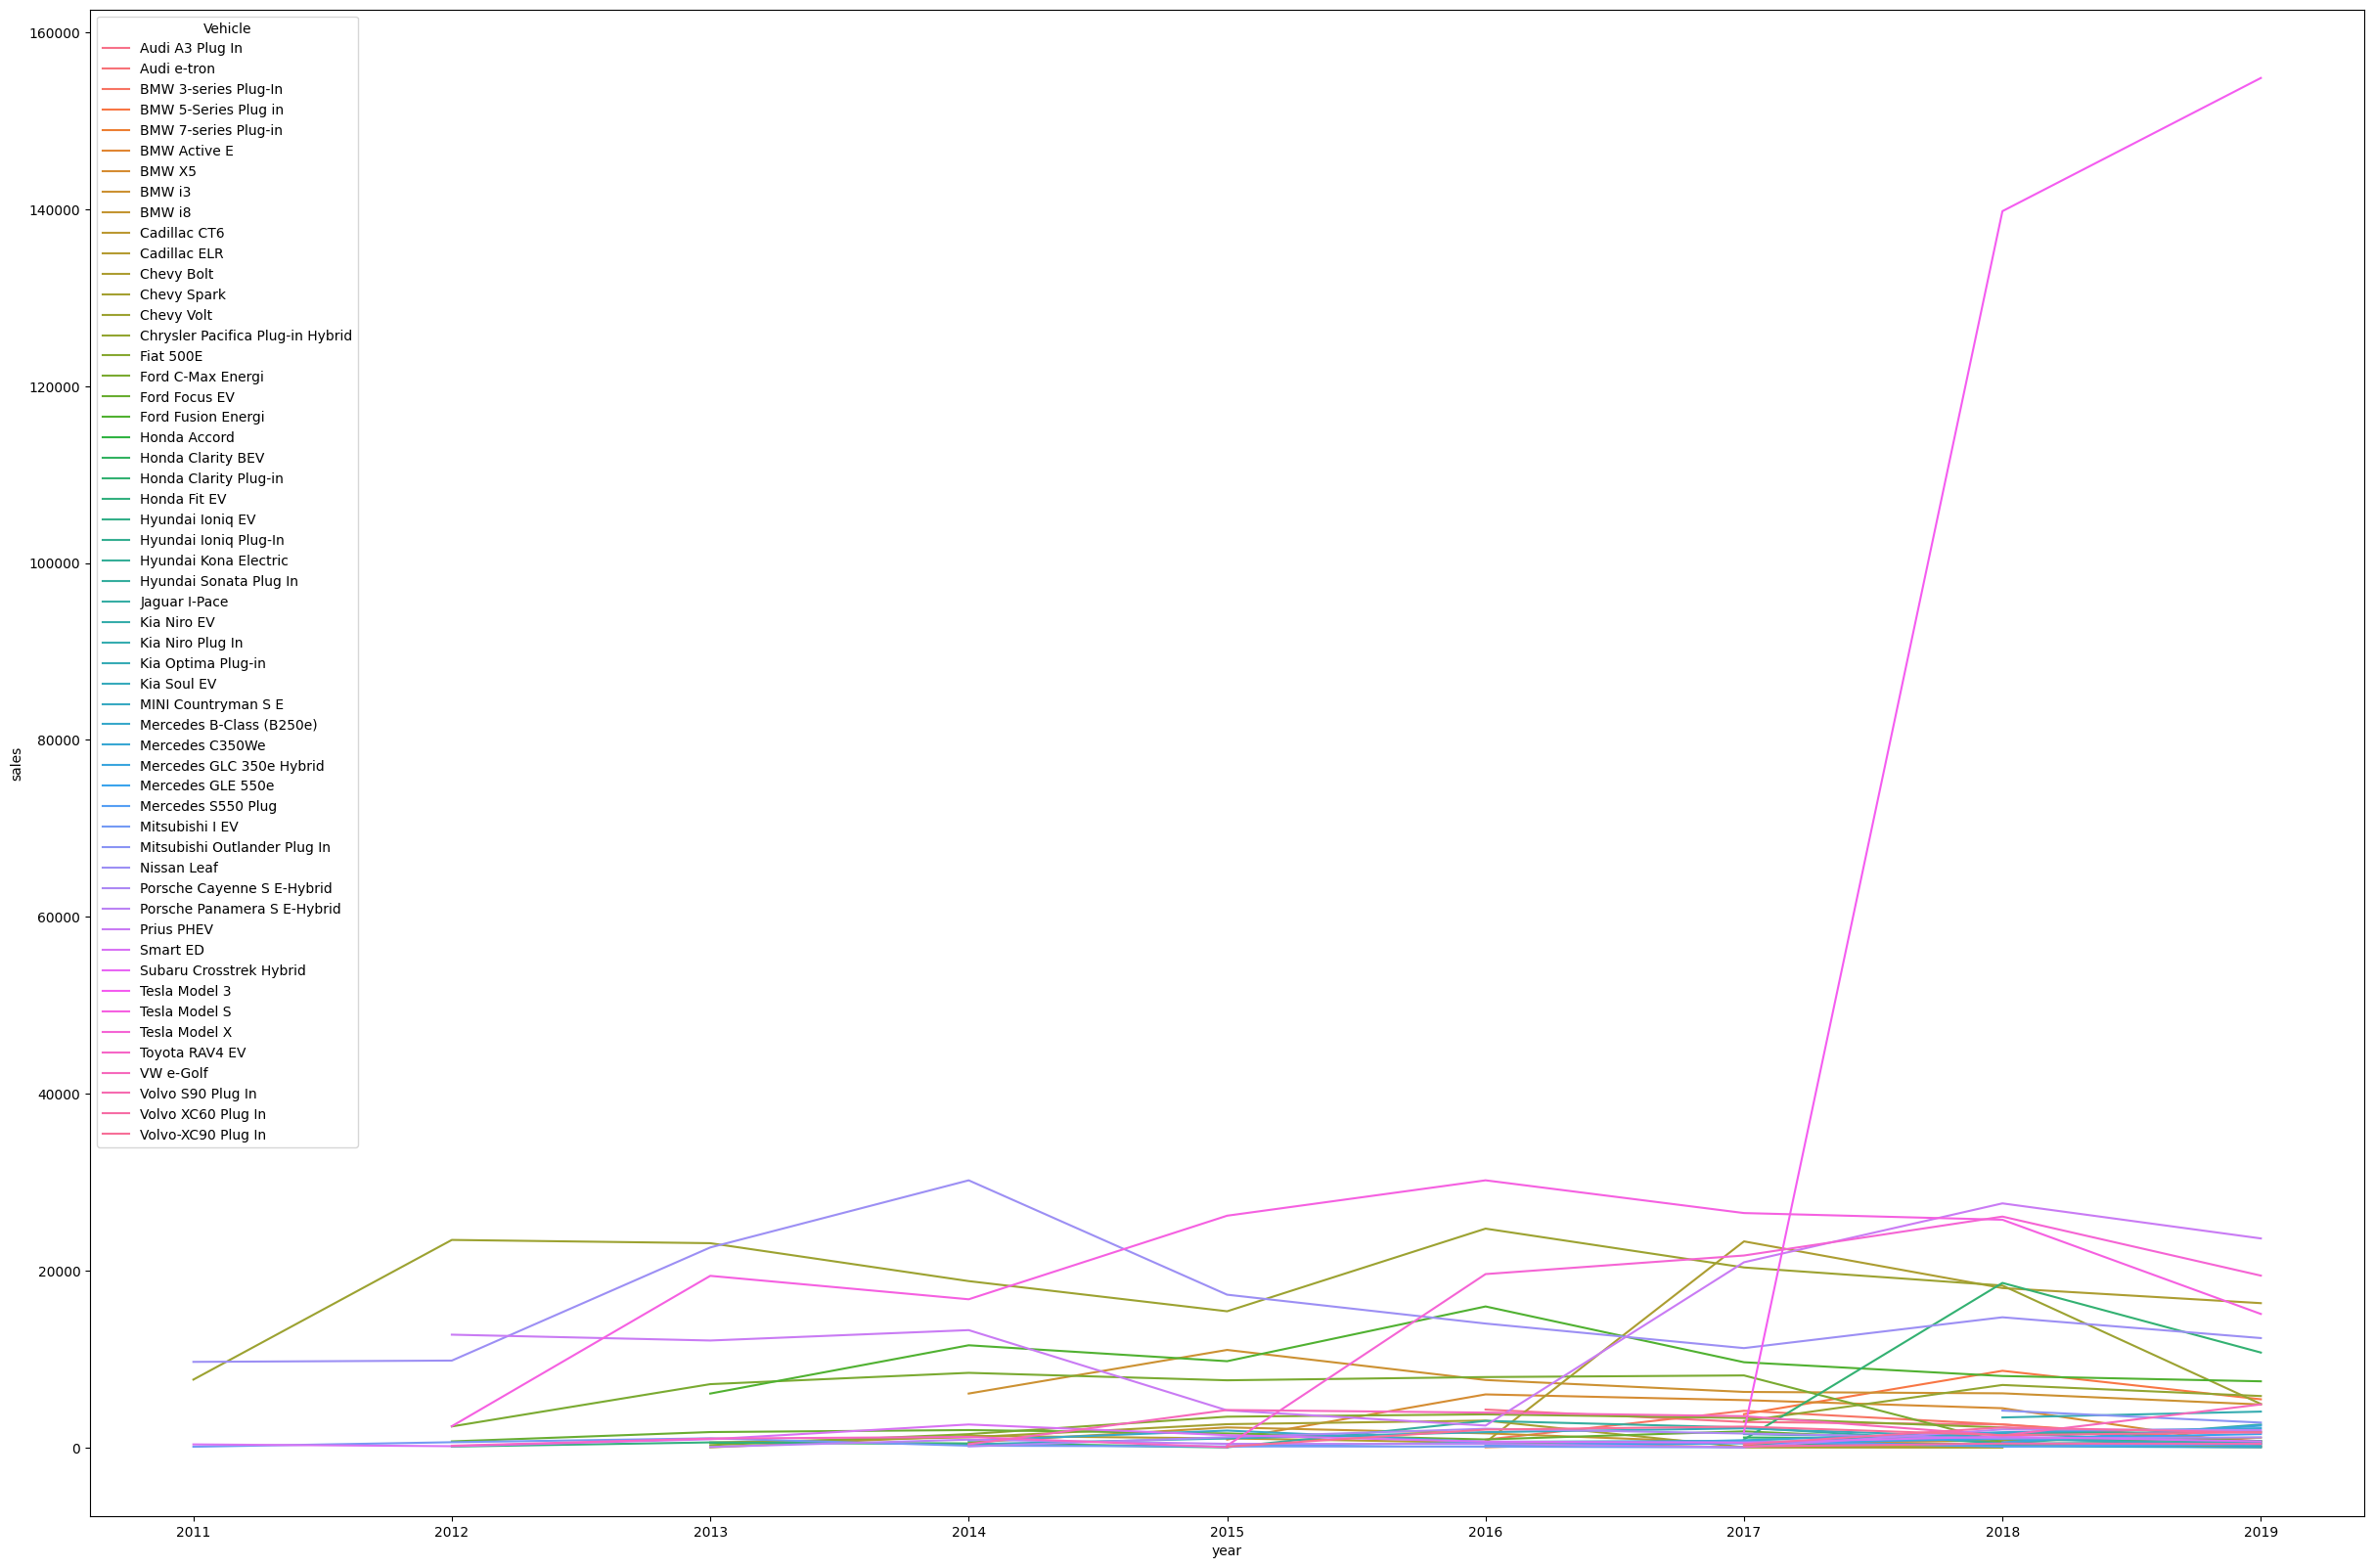

In [69]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.lineplot(data=data, x="year", y="sales", hue="Vehicle")

In [101]:
# sales of top10 selling vehicles over the years(2011 - 2019)

top10_cars = (
    data.groupby("Vehicle")["sales"]
    .sum()
    .reset_index()
    .sort_values("sales", ascending=False)
)

In [104]:
top10_cars = top10_cars.head(10)

In [106]:
top10_cars

,Vehicle,sales
46,Tesla Model 3,296392.0
47,Tesla Model S,162285.0
13,Chevy Volt,156733.0
40,Nissan Leaf,141888.0
43,Prius PHEV,116927.0
48,Tesla Model X,87033.0
18,Ford Fusion Energi,68509.0
11,Chevy Bolt,58208.0
16,Ford C-Max Energi,42231.0
7,BMW i3,41988.0


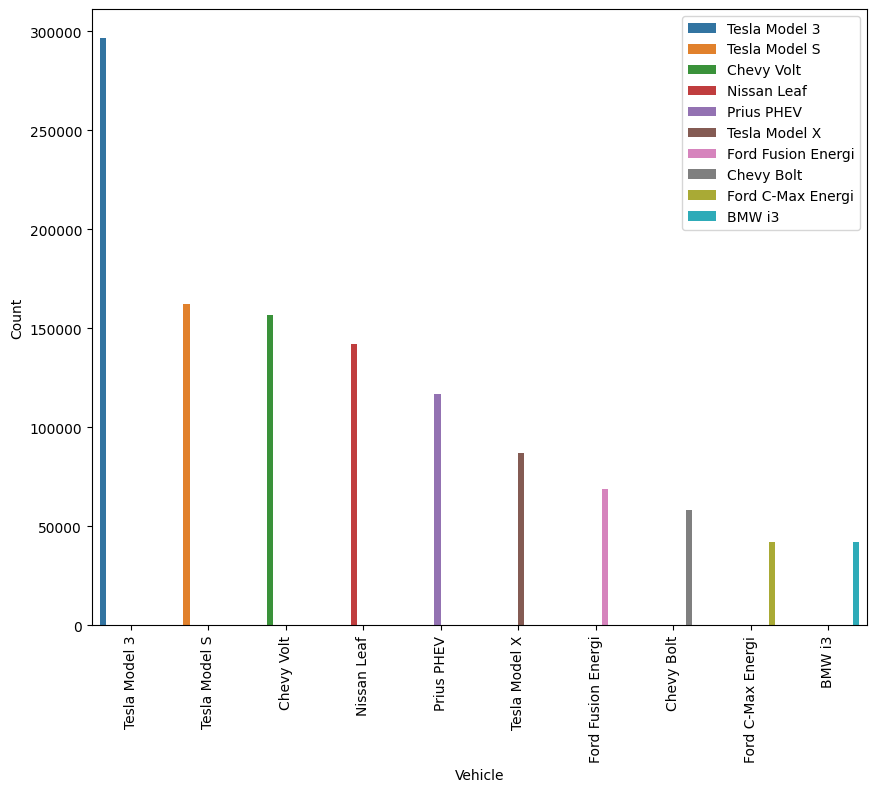

In [107]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=top10_cars, x="Vehicle", y="sales", hue="Vehicle")
ax.set_xticklabels(labels=list(top10_cars.Vehicle), rotation=90)
ax.set_ylabel("Count")
ax.legend(loc="upper right")

In [108]:
data_top10 = data[data["Vehicle"].isin(list(top10_cars.Vehicle))]
data_top10

,Vehicle,year,sales
22,BMW i3,2014,6092.0
23,BMW i3,2015,11024.0
24,BMW i3,2016,7625.0
25,BMW i3,2017,6276.0
26,BMW i3,2018,6117.0
...,...,...,...
215,Tesla Model X,2015,208.0
216,Tesla Model X,2016,19600.0
217,Tesla Model X,2017,21700.0
218,Tesla Model X,2018,26100.0


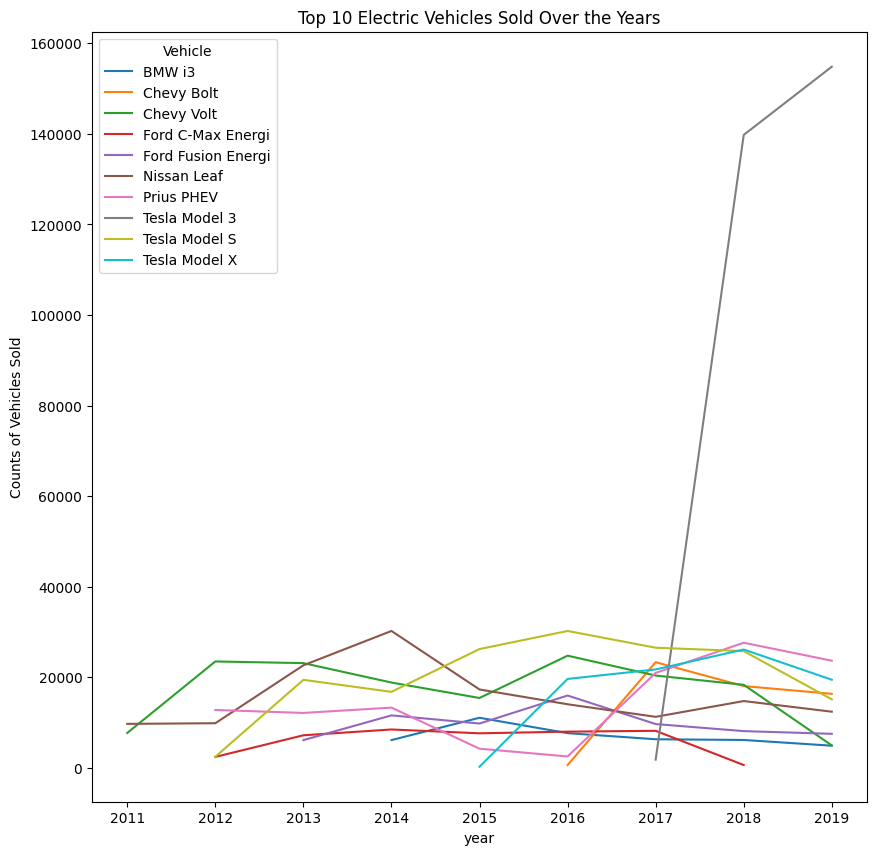

In [116]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(data=data_top10, x="year", y="sales", hue="Vehicle")
ax.set_ylabel("Counts of Vehicles Sold")
ax.set_title("Top 10 Electric Vehicles Sold Over the Years")
plt.show()

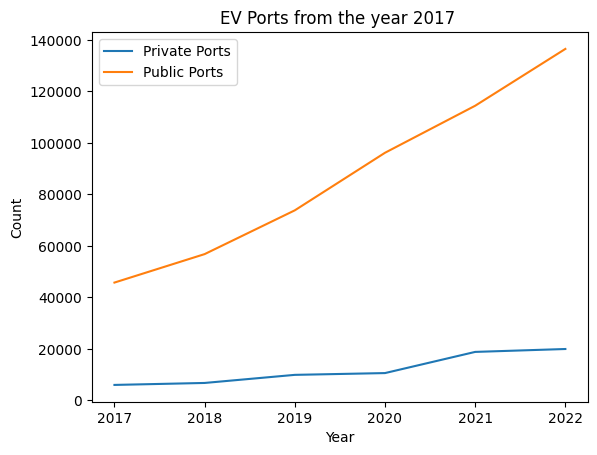

In [120]:
# charging ports from year 2017

df_temp_2017 = df_temp.query("year > 2016")

fig, ax = plt.subplots()
sns.lineplot(data=df_temp_2017, x="year", y="private_ports", label="Private Ports")
sns.lineplot(data=df_temp_2017, x="year", y="public_ports", label="Public Ports")
ax.set_title("EV Ports from the year 2017 ")
ax.set(xlabel="Year", ylabel="Count")
ax.legend(loc="upper left")
plt.show()